# Lab 02: Modelling & Model Error

Name: Paige Rosynek

Date: 9.20.2022

### Introduction

The purpose of this lab is to gain familiarity with machine learning models and the process of implementing, visualizing, and evaluating a model. Another goal of this lab is to gain experience with model parameters and how they effect a given model. In this lab, we performed two experiments on two different data sets. Each experiment consisted of the same or similar steps and followed the general structure: data familiarity, model familiarity, model implementation, model output and visualization, and model error. The first experiment was done on a gaussian distribution dataset that contained one independent variable and one dependent variable. The gaussian probablility distibution function was used to predict the output values and was evaluated using mean absolute error. The second experiment was done on advertising data that consisted of four independent variables and one dependent variable. Multiple linear regression was used to predict the sales of the given independent variables, and model parameters were chosen arbitrarily. To evaluate this model, MAE was also used for the error. The two experiments performed exemplify the modelling process given different numbers of independent variables and model parameters, along with how these affect model performance.

### Questions:

1. **Describe the relationship between the number of independent variables, dependent variables, and model parameters. If there is no dependence between them, please state this and discuss why this might be or what implications it has.**

A model that has a large number of independent variables also has a large number of model parameters, because the shape of the model parameters must match the shape of the independent variables for the linear regression model. The complexity of a model increases with the model parameters, but can be fine tuned to be more precise due to a large number of parameters. Thus, a more accurate model can be trained given more model parameters. The number of dependent variables does not directly relate to the number of independent variables and model parameters it depends on the model being used.

2. **For this lab you were given datasets that had paired independent and dependent variables (supervised data).**

  - **What would your model do if you gave it an independent variable value not from this dataset?**

    The model would predict a sales value, output value, for the given input (input variable).


  - **Do you think the resulting output would be correct?**

    The resulting output would simply be an approximation or prediction of what the sales should be, it would not be completely accurate or correct. The accuracy of the model output is dependent on data used to train the model and the model parameters. For example, a model could have the accuracy of 98% after training on data with 98 samples for class 0 and 2 samples for class 1. The model output for the advertising data was done using arbitrary weights (parameters) and it was not trained to find the best set of weights, thus the accuracy of this model is not optimal.
    

  - **How can you be sure?**

    One way to be sure would be to split the data using a test-train split. After splitting the data, the model should be trained on the training set and then fed the testing set to see how well the model can predict unseen data from the dataset. In theory, the better the model can predict the testing data, the better the model should be able to predict naive data. We can use error metrics to evaluate the performance of the model to be sure.

3. **You used mean absolute error to quantify the difference between your given data and model predictions. Lookup (either online or from your textbook) another metric used to quantify error.**

  - **Compare and contrast this new metric with mean absolute error.**
    
    Anothe metric used to quantify error is MSE, or Mean Squared Error. The equation for MSE can be described as the average squared distance between the given data and prediction. One characteristic of MSE is that due to the error (distance) being squared observations with large error is given higher importance. In other words, MSE punishes large errors and is a good error metric for when you need your model to minimize large error. In comparison, MAE does not punish large errors but is easier to interpret because the error is of degree 1, unlike MSE.

  - **Discuss what you think the advantages/disadvantages might be between MAE and your other metric. Hint: What shape do different error functions have as you change model parameters to get predictions that are closer to your observed data?**

    As mentioned above, MSE is sensitive to outliers in that the model emphasizes large errors due to the distance being squared. Therefore, if you want your model to punish large error, MSE is a better metric. With MSE, error increases quadratically while MAE error is proportional to the data which gives a better understanding of the performance of the whole dataset. This makes interpretting MAE error much easier than MSE error because MSE error is squared. 

4. **We had you plot multiple figures for experiment 2.**
  - **Can you think of a way to plot 2 independent variables and the dependent variable on the same plot?**
    
    One way to plot 2 independent variables and the dependent variable on the same plot is by creating a 3D scatter plot where the dependent variable is on the z axis and each independent variable is on the x and y axis. Then each point represents a sample and has the form 
    (independent var 1, independent var 2, dependent var).

  - **What about a way to visualize 3 independent variables and the dependent variable on the same plot? 4 and 1?**

    In order to plot 3 independent variables and one dependent variable on the same plot, you could do the same process as described above and plot in 3 dimensions. Then for the 3rd independent variable, you can model the value with the opacity of the plotted points. To plot a graph with 4 independent variables and 1 dependent variable you could create a 2D scatter plot. Each feature would have to first be scaled such that all of the features have the same scale, then create a scatter plot of all the features versus the dependent variable and give each feature a color with a label in the legend.

  - **What about a way to visualize a dataset of 100 features and 1 dependent variable on the same plot?**

    To plot a graph with 100 independent variables and 1 dependent variable you could create a 2D scatter plot. Each feature would have to first be scaled such that all of the features have the same scale, then create a scatter plot of all the features versus the dependent variable and give each feature a color with a label in the legend. This most likely is not the best option as the plot will most likely become very cluttered and hard to decipher.

  - **With these plots in mind, describe how the error metric can help.**

    The error metric can help us decide what features do not have a large impact on the model so we can determine which features we can maybe omit from the model, resulting in less features to plot. In addition, the error metric could be used to compare to a threshold error that determines whether or not to plot the feature.

5. **How well did the model parameter sets you chose for experiment 2 perform? With the methods and tools that you have at your disposal, can you think of a more structured way to find a good set of parameters rather than picking a set and checking? Hint: It is relatively inexpensive to evaluate these models. How could you use a loop, or set of loops, to find a set of model parameters that have low error?**

    For experiment 2, the model parameters I chose performed exceptionally bad. The calculated error for each respective parameter set was 
    18.497 and 8.396. A better way to find a good set of parameters for the model is by using loops. First, choose a threshold error and a random set of parameters. Then loop through each parameter value and either increase or decrease the parameter value by a set amount. If the error is less than the threshold error, save the parameters and error in a matrix. Once the loop iterations are complete, choose the model parameters that produced the lowest error.

### Experiment 1: Gaussian Distribution

#### Part I - Given Data

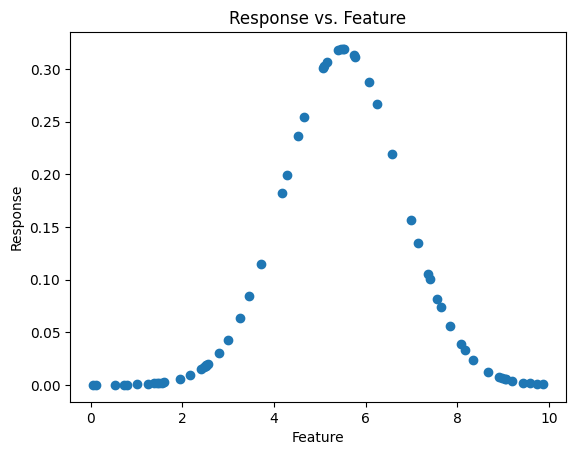

In [277]:
import numpy as np
import matplotlib.pyplot as plt

gdist = np.loadtxt('../Data/gaussdist.csv', delimiter=',', dtype=np.float64)
gdist.shape    # (60, 2)

x = gdist[:, 0]    # feature vector  (60,)
y = gdist[:, 1]    # response vector (60,)

ax = plt.axes()

plt.title('Response vs. Feature') 
plt.xlabel('Feature')
plt.ylabel('Response')
ax.scatter(x, y)
plt.show()

#### Part II - Model Familiarity

Gaussian Distribution Probability Density Function:

$f(x) = \frac{1}{\sigma \sqrt{2\pi}}\, e^{-\frac{(x - \mu)^2}{2\sigma^2}}$

a. Model Parameters:
- $\mu = $ mean 
- $\sigma = $ standard deviation

b. Independent Variables:
- $x = $ feature
- $\mu = $ mean 
- $\sigma = $ standard deviation

c. Dependent Variables:
- $f(x) = $ response

#### Part III - Model Implementation

In [278]:
def f(x, mu, sig):
    return np.power(sig * np.sqrt(2 * np.pi), -1) * np.exp(-0.5 * ((x-mu) / sig)**2)


#### Part IV - Model Output & Visualization

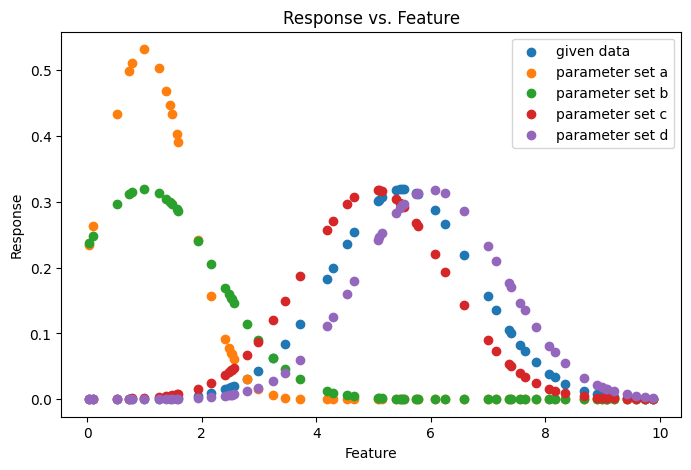

In [279]:
y_a = f(x, 1, 0.75)
y_b = f(x, 1, 1.25)
y_c = f(x, 5, 1.25)
y_d = f(x, 6, 1.25)

fig = plt.figure(figsize=(8,5))
ax = plt.axes()

ax.scatter(x, y, label='given data')
ax.scatter(x, y_a, label='parameter set a')
ax.scatter(x, y_b, label='parameter set b')
ax.scatter(x, y_c, label='parameter set c')
ax.scatter(x, y_d, label='parameter set d')

plt.title('Response vs. Feature') 
plt.xlabel('Feature')
plt.ylabel('Response')
plt.legend()
plt.show()


#### Part V - Error Between Model & Data

Mean Absolute Error:

$MAE = \frac{\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |}{n}$

- a. Model predictions: $y_{i}$

- b. Dependent Variables (from dataset): $x_{i}$




0.18937403173481707 	 0.16922757281678635 	 0.026490469979950228 	 0.027470666663403025


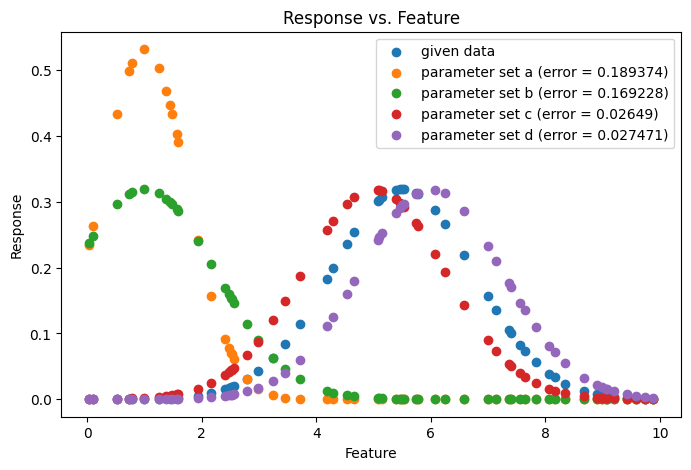

In [280]:
def mean_absolute_error(x, y):
    return np.mean(np.abs(y-x))

y_true = gdist[:, 1]
a_err = mean_absolute_error(y_true, y_a)
b_err = mean_absolute_error(y_true, y_b)
c_err = mean_absolute_error(y_true, y_c)
d_err = mean_absolute_error(y_true, y_d)

print(a_err, "\t", b_err, "\t", c_err, "\t", d_err)

fig = plt.figure(figsize=(8,5))
ax = plt.axes()

ax.scatter(x, y, label='given data')
ax.scatter(x, y_a, label='parameter set a (error = {})'.format(round(a_err, 6)))
ax.scatter(x, y_b, label='parameter set b (error = {})'.format(round(b_err, 6)))
ax.scatter(x, y_c, label='parameter set c (error = {})'.format(round(c_err, 6)))
ax.scatter(x, y_d, label='parameter set d (error = {})'.format(round(d_err, 6)))

plt.title('Response vs. Feature') 
plt.xlabel('Feature')
plt.ylabel('Response')
plt.legend()
plt.show()

### Experiment 2 - Multiple Linear Regression Model

#### Part I - Given Data

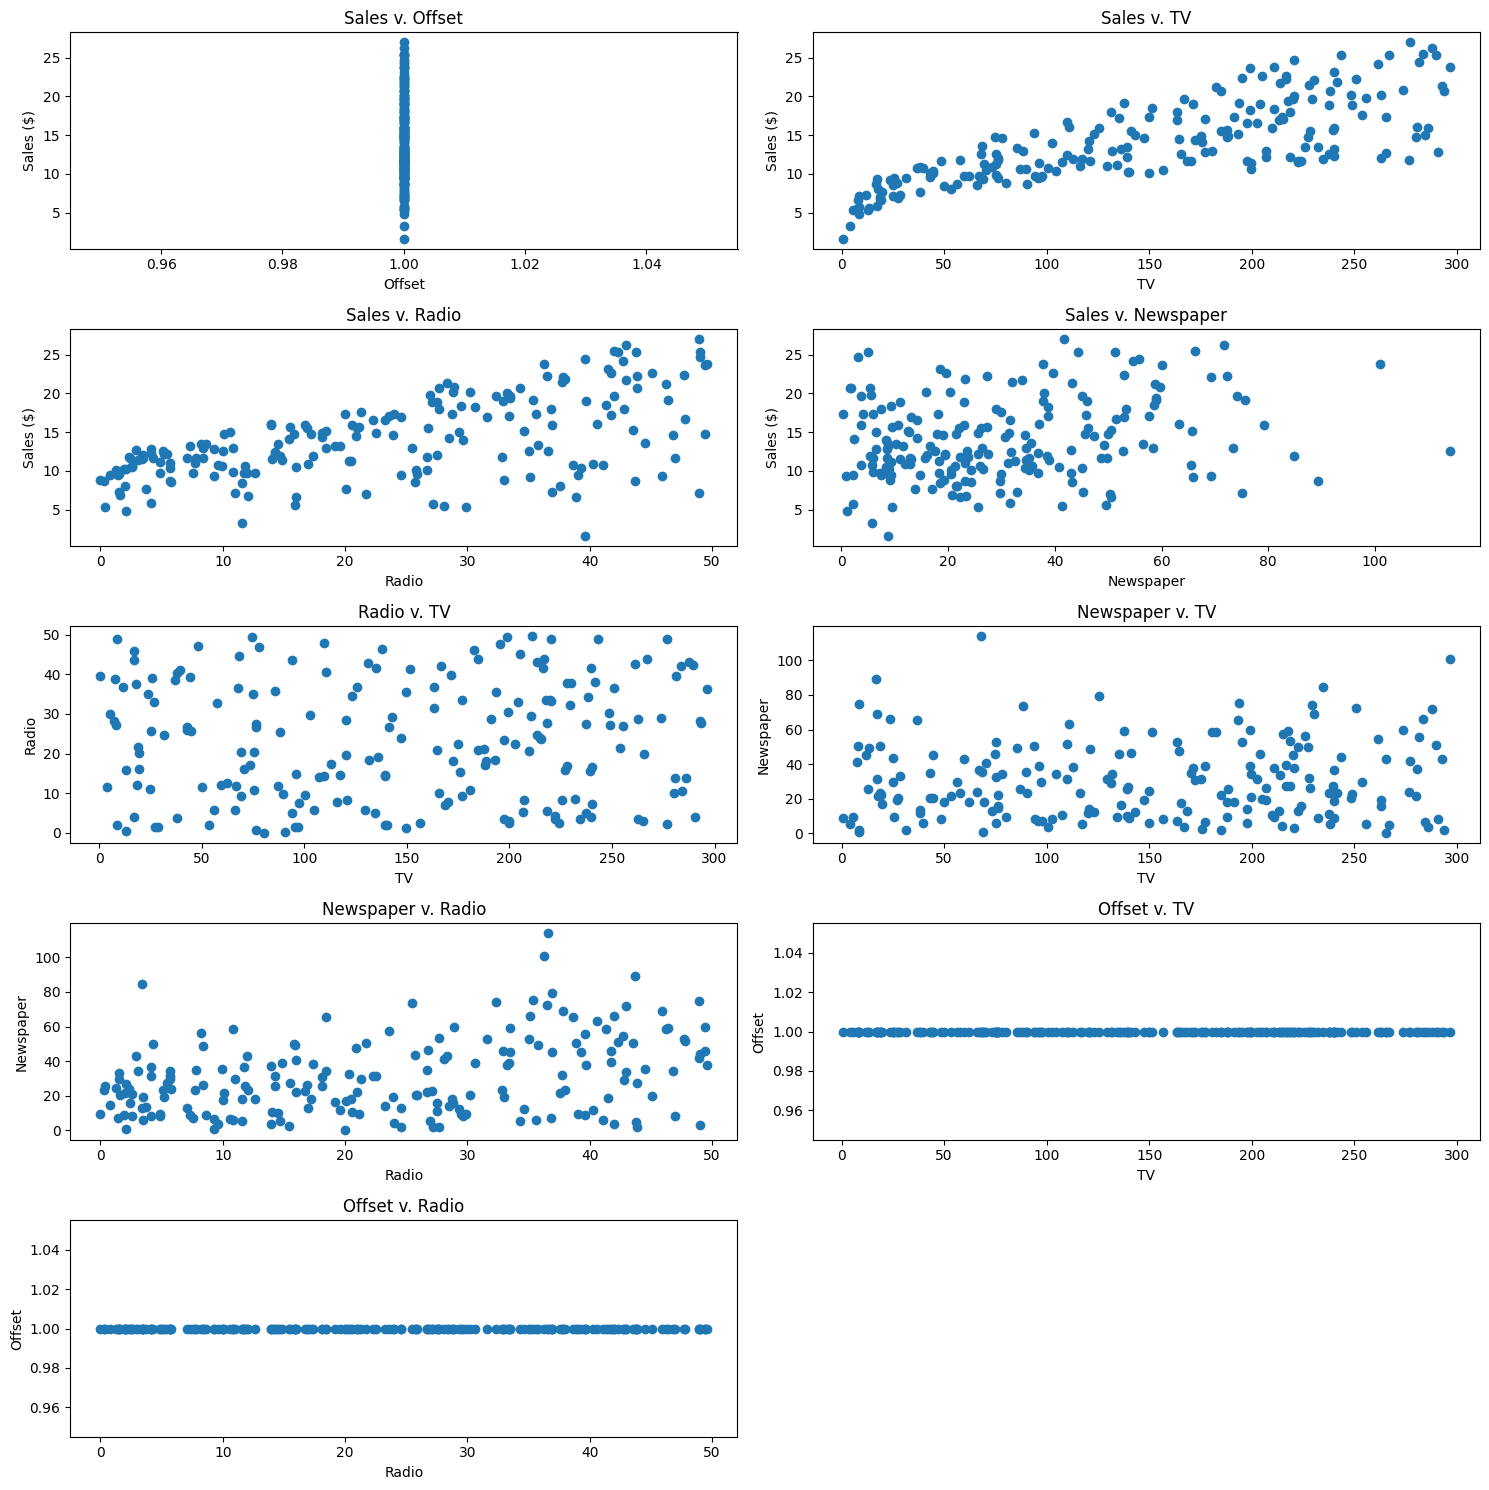

(200, 4)


In [281]:
ad_data = np.loadtxt('../Data/advertising.csv', delimiter=',', skiprows=1, usecols=range(1,6))

x = ad_data[:, :4]
y = ad_data[:, -1]

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(521, adjustable='box')
ax1.scatter(x[:, 0], y)
ax1.set_xlabel('Offset')
ax1.set_ylabel('Sales ($)')
ax1.set_title('Sales v. Offset')

ax2 = fig.add_subplot(522)
ax2.scatter(x[:, 1], y)
ax2.set_xlabel('TV')
ax2.set_ylabel('Sales ($)')
ax2.set_title('Sales v. TV')

ax3 = fig.add_subplot(523, adjustable='datalim', aspect='auto')
ax3.scatter(x[:, 2], y)
ax3.set_xlabel('Radio')
ax3.set_ylabel('Sales ($)')
ax3.set_title('Sales v. Radio')

ax4 = fig.add_subplot(524, adjustable='datalim', aspect='auto')
ax4.scatter(x[:, 3], y)
ax4.set_xlabel('Newspaper')
ax4.set_ylabel('Sales ($)')
ax4.set_title('Sales v. Newspaper')

#----ind v. ind-----
ax5 = fig.add_subplot(525, adjustable='datalim', aspect='auto')
ax5.scatter(x[:, 1], x[:,2])
ax5.set_xlabel('TV')
ax5.set_ylabel('Radio')
ax5.set_title('Radio v. TV')

ax6 = fig.add_subplot(526, adjustable='datalim', aspect='auto')
ax6.scatter(x[:, 1], x[:,3])
ax6.set_xlabel('TV')
ax6.set_ylabel('Newspaper')
ax6.set_title('Newspaper v. TV')

ax7 = fig.add_subplot(527, adjustable='datalim', aspect='auto')
ax7.scatter(x[:, 2], x[:,3])
ax7.set_xlabel('Radio')
ax7.set_ylabel('Newspaper')
ax7.set_title('Newspaper v. Radio')

ax8 = fig.add_subplot(528, adjustable='datalim', aspect='auto')
ax8.scatter(x[:, 1], x[:,0])
ax8.set_xlabel('TV')
ax8.set_ylabel('Offset')
ax8.set_title('Offset v. TV')

ax9 = fig.add_subplot(529, adjustable='datalim', aspect='auto')
ax9.scatter(x[:, 2], x[:,0])
ax9.set_xlabel('Radio')
ax9.set_ylabel('Offset')
ax9.set_title('Offset v. Radio')

plt.tight_layout()
plt.show()

print(x.shape)

### Part II - Model Familiarity

Multiple Linear Regression:

$y = x^Tw + w_{0} = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + w_{0}$

where:

- $w_i$ : the ith parameter, $w $ $ \in$  $\mathbb{R}^{4x1}$
- $x_i$ : the ith feature from the data ('Offset', 'TV', 'Radio', 'Newspaper),  $x $ $ \in$  $\mathbb{R}^{200x4}$
- $y$ : predicted sales (scalar)

a. Model parameters:
- column vector $w$, such $w $ $ \in$  $\mathbb{R}^{4x1}$
- $w_i$ : the ith model parameter
- $w_0$ : offset, y-intercept

b. Independent variables:
- feature matrix $x$, such $x $ $ \in$  $\mathbb{R}^{4x1}$
- $x_i$ : the ith feature sample from the data ('Offset', 'TV', 'Radio', 'Newspaper)

c. Dependent variables:
- $y$ : scalar value that represents predicted sales


### Part III - Model Implementation: Multiple Linear Regression

In [282]:
def m_linear_reg(x, w):
    return np.dot(x, w) 

### Part IV - Model Output & Visualization

Text(0.5, 0.98, '')

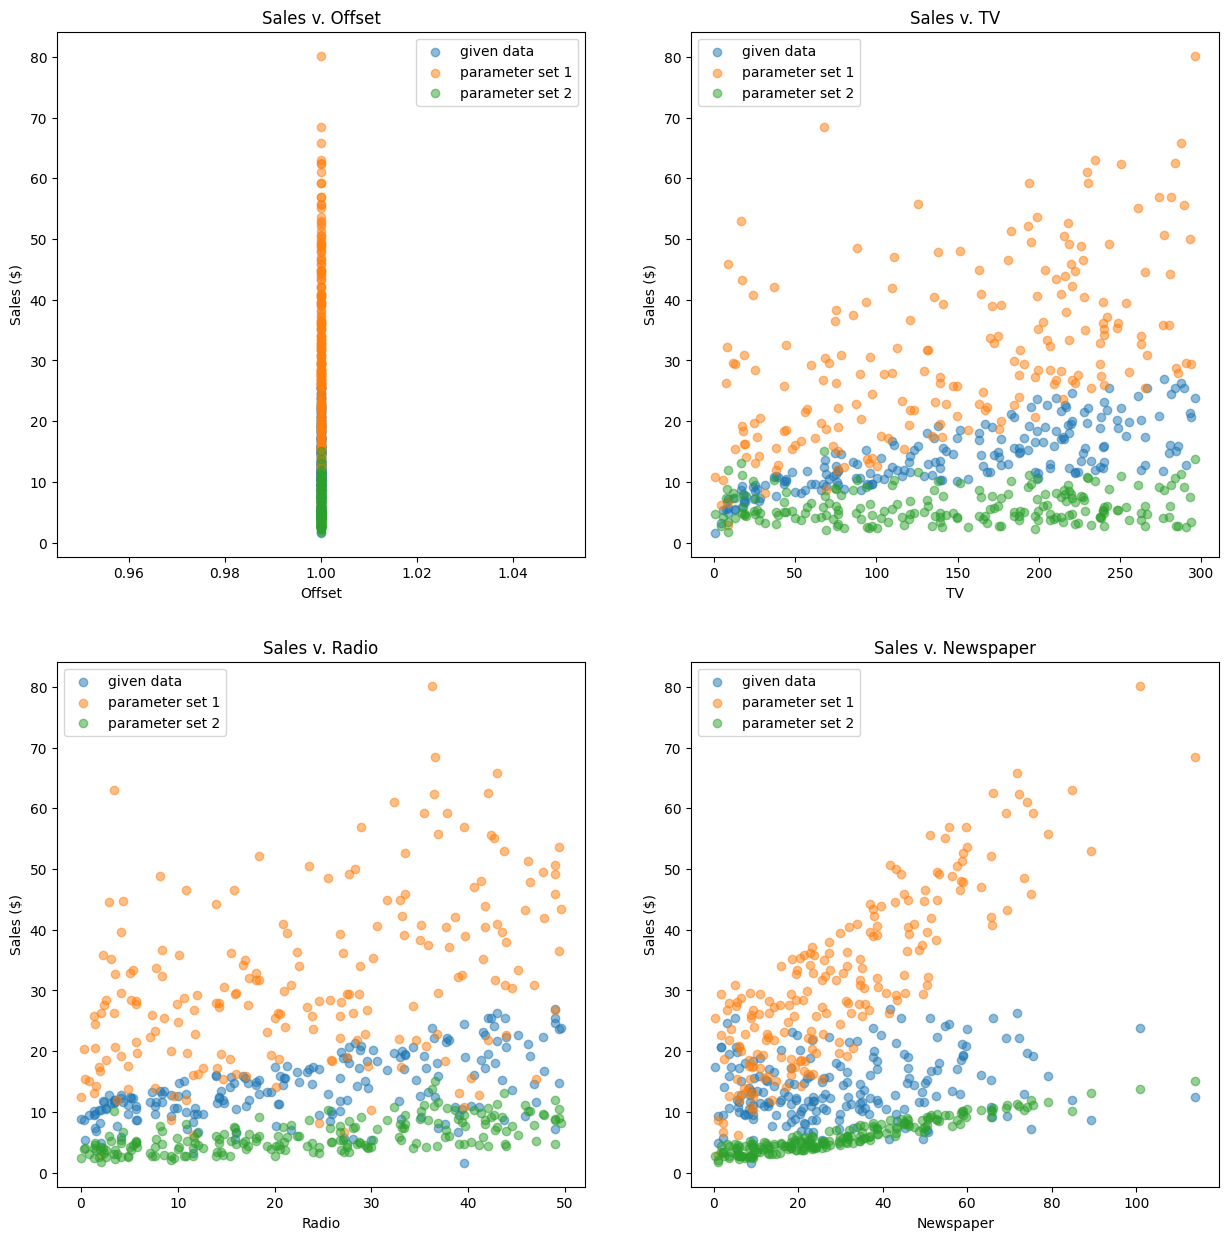

In [283]:
w_a = np.array([1.5, 0.08, 0.125, 0.5]).reshape(4,1)
w_b = np.array([1.5, 0, 0.06, 0.1]).reshape(4,1)

y_1 = m_linear_reg(x, w_a)
y_2 = m_linear_reg(x, w_b)

#print(y_a)

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(221, adjustable='box')
ax1.scatter(x[:,0], y, label='given data', alpha=0.5)
ax1.scatter(x[:,0], y_1, label='parameter set 1', alpha=0.5)
ax1.scatter(x[:,0], y_2, label='parameter set 2', alpha=0.5)
ax1.set_xlabel('Offset')
ax1.set_ylabel('Sales ($)')
ax1.set_title('Sales v. Offset')
ax1.legend()

ax2 = fig.add_subplot(222, adjustable='box')
ax2.scatter(x[:,1], y, label='given data', alpha=0.5)
ax2.scatter(x[:,1], y_1, label='parameter set 1', alpha=0.5)
ax2.scatter(x[:,1], y_2, label='parameter set 2', alpha=0.5)
ax2.set_xlabel('TV')
ax2.set_ylabel('Sales ($)')
ax2.set_title('Sales v. TV')
ax2.legend()

ax3 = fig.add_subplot(223, adjustable='box')
ax3.scatter(x[:,2], y, label='given data', alpha=0.5)
ax3.scatter(x[:,2], y_1, label='parameter set 1', alpha=0.5)
ax3.scatter(x[:,2], y_2, label='parameter set 2', alpha=0.5)
ax3.set_xlabel('Radio')
ax3.set_ylabel('Sales ($)')
ax3.set_title('Sales v. Radio')
ax3.legend()

ax4 = fig.add_subplot(224, adjustable='box')
ax4.scatter(x[:,3], y, label='given data', alpha=0.5)
ax4.scatter(x[:,3], y_1, label='parameter set 1', alpha=0.5)
ax4.scatter(x[:,3], y_2, label='parameter set 2', alpha=0.5)
ax4.set_xlabel('Newspaper')
ax4.set_ylabel('Sales ($)')
ax4.set_title('Sales v. Newspaper')
ax4.legend()
fig.suptitle('')

### Part V - Error Between Model & Data

Mean Absolute Error:

$MAE = \frac{\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |}{n}$

- a. Model predictions: $y_{i}$  (sales prediction)

- b. Dependent Variables (from dataset): $x_{i}$ (actual sales)

18.496455049999998 	 8.3955994


Text(0.5, 0.98, 'Model Output v. Input')

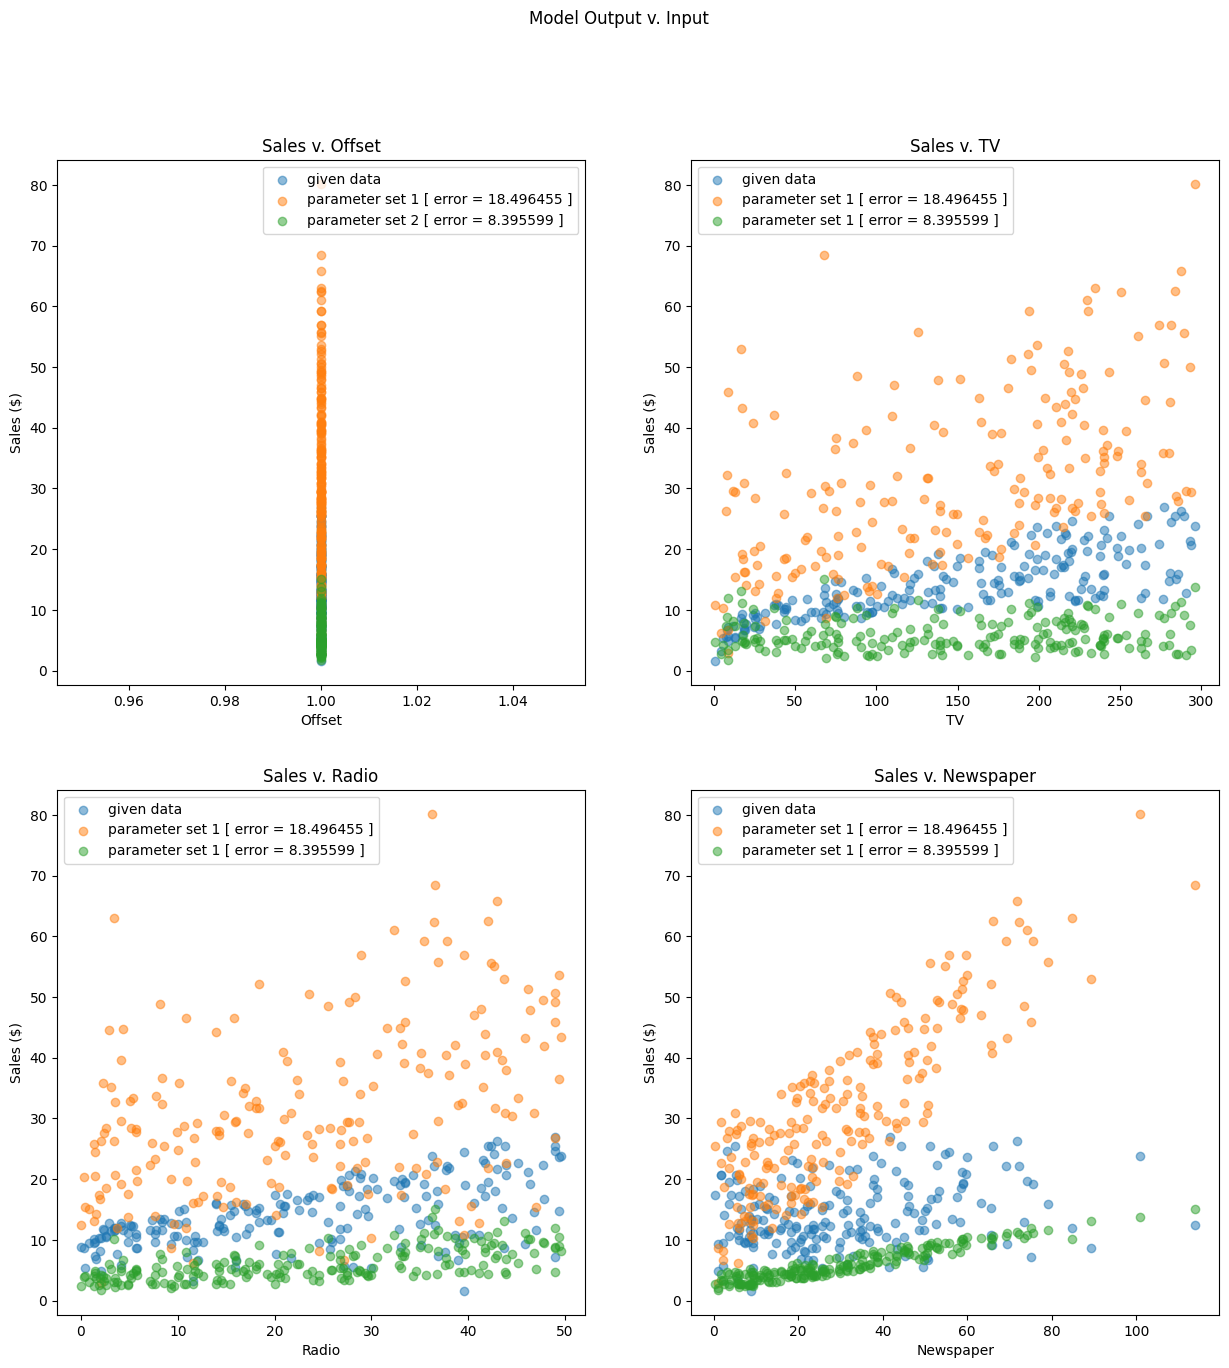

In [284]:
err1 = mean_absolute_error(y_1, y)
err2 = mean_absolute_error(y_2, y)

print(err1, "\t", err2)

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(221, adjustable='box')
ax1.scatter(x[:,0], y, label='given data', alpha=0.5)
ax1.scatter(x[:,0], y_1, label='parameter set 1 [ error = {} ]'.format(round(err1, 6)), alpha=0.5)
ax1.scatter(x[:,0], y_2, label='parameter set 2 [ error = {} ]'.format(round(err2, 6)), alpha=0.5)
ax1.set_xlabel('Offset')
ax1.set_ylabel('Sales ($)')
ax1.set_title('Sales v. Offset')
ax1.legend()

ax2 = fig.add_subplot(222, adjustable='box')
ax2.scatter(x[:,1], y, label='given data', alpha=0.5)
ax2.scatter(x[:,1], y_1, label='parameter set 1 [ error = {} ]'.format(round(err1, 6)), alpha=0.5)
ax2.scatter(x[:,1], y_2, label='parameter set 1 [ error = {} ]'.format(round(err2, 6)), alpha=0.5)
ax2.set_xlabel('TV')
ax2.set_ylabel('Sales ($)')
ax2.set_title('Sales v. TV')
ax2.legend()

ax3 = fig.add_subplot(223, adjustable='box')
ax3.scatter(x[:,2], y, label='given data', alpha=0.5)
ax3.scatter(x[:,2], y_1, label='parameter set 1 [ error = {} ]'.format(round(err1, 6)), alpha=0.5)
ax3.scatter(x[:,2], y_2, label='parameter set 1 [ error = {} ]'.format(round(err2, 6)), alpha=0.5)
ax3.set_xlabel('Radio')
ax3.set_ylabel('Sales ($)')
ax3.set_title('Sales v. Radio')
ax3.legend()

ax4 = fig.add_subplot(224, adjustable='box')
ax4.scatter(x[:,3], y, label='given data', alpha=0.5)
ax4.scatter(x[:,3], y_1, label='parameter set 1 [ error = {} ]'.format(round(err1, 6)), alpha=0.5)
ax4.scatter(x[:,3], y_2, label='parameter set 1 [ error = {} ]'.format(round(err2, 6)), alpha=0.5)
ax4.set_xlabel('Newspaper')
ax4.set_ylabel('Sales ($)')
ax4.set_title('Sales v. Newspaper')
ax4.legend()
fig.suptitle('Model Output v. Input')